In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis import IDKickMap
from mathphys.functions import save_pickle, load_pickle
from scipy.optimize import curve_fit
import utils

In [2]:
def plot_field_roll_off(data, gap):
    plt.figure(1)
    colors = ['b', 'g', 'y', 'C1', 'r', 'k']
    widths = list(data.keys())
    for i, width in enumerate(widths):
        bx = data[width]['rolloff_bx']
        ry = data[width]['rolloff_ry']
        ry6_idx = np.argmin(np.abs(ry - 1))
        ry0_idx = np.argmin(np.abs(ry))
        roff = np.abs(bx[ry6_idx]/bx[ry0_idx]-1)
        label = "width {}, roll-off = {:.2f} %".format(width, 100*roff)
        iry0 = np.argmin(np.abs(ry))
        bx0 = bx[iry0]
        roll_off = 100*(bx/bx0 - 1)
        print(label)
        plt.plot(ry, roll_off, '.-', label=label, color=colors[i])
        # plt.plot(ry, bx, label=label, color=colors[i])
    plt.xlabel('y [mm]')
    # plt.ylabel('By [T]')
    plt.ylabel('roll off [%]')
    plt.xlim(-1, 1)
    plt.ylim(-1.2, 0.02)
    plt.title('Field roll-off at x = 1 mm for Gap {:.1f} mm'.format(gap))
    plt.legend()
    plt.grid()
    plt.clf()
    #plt.savefig(utils.FOLDER_DATA + 'field-rolloff', dpi=300)
    #plt.show()
    return ry, bx, roll_off

In [3]:
def run_plot_data(gap, widths):

    data_plot = dict()
    gap_str = utils.get_gap_str(gap)
    for width in widths:
        fname = utils.FOLDER_DATA
        fname += 'field_data_gap{}_width{}'.format(gap_str, width)
        fdata = load_pickle(fname)
        data_plot[width] = fdata

    ry, bx, roll_off = plot_field_roll_off(data=data_plot, gap=gap)
    return ry, bx, roll_off

In [4]:
widths = [30]
gap = 9.7

width 30, roll-off = 0.25 %
0.78691959390436
kx =  0.07117086041125542


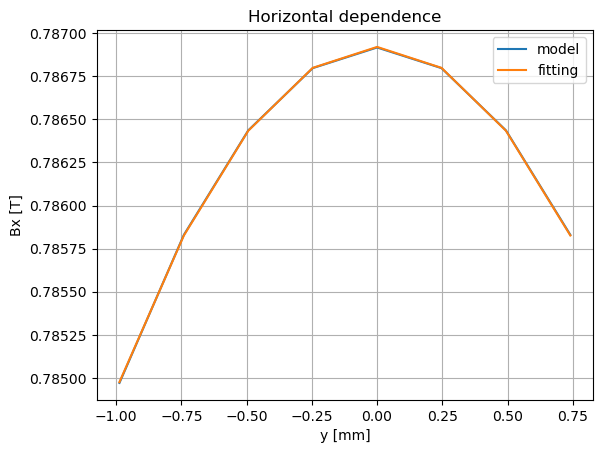

In [5]:
kxl = list()
phil = list()
def cos(x, b0, kx):
    b = b0*np.cos(kx*x)
    return b
phases = [0]
ry, bx, roff = run_plot_data(gap, widths)
idxi = np.argmin(np.abs(ry+1))
idxf = np.argmin(np.abs(ry-1.1))
ry = ry[idxi:idxf]
bx = bx[idxi:idxf]
opt = curve_fit(cos, ry, bx)[0]
print(opt[0])
print('kx = ', opt[1])
b_fitted = cos(ry, opt[0], opt[1])
plt.plot(ry, bx, label='model')
plt.plot(ry, b_fitted, label='fitting')
plt.xlabel('y [mm]')
plt.ylabel('Bx [T]')
plt.title('Horizontal dependence')
plt.grid()
plt.legend()
    

In [22]:
period = 29
b = 0.71
l = period*1e-3*5*10
R = 10
kz = 2*np.pi/(period*1e-3)
kx = kx*1e3
ky = np.sqrt(kx**2+kz**2)
betax = 1.36
betay = 1.60
print('kx = ', kx)
print('kz = ', kz)
print('ky = ', ky)

phase = 0*1e-3
factor = 1 + np.cos(kz*phase) - (kx**2)/(kz**2+kx**2)*(1-np.cos(kz*phase))

a = (1/(kz**2))*l*(b**2)/(4*R**2)
coefy = a*factor*kx**2
coefx = -a*2*ky**2


print('horizontal quadrupolar term: {:.5f}'.format(coefx))
print('vertical quadrupolar term: {:.5f}'.format(coefy))

dtunex = -l*coefx*betax/(4*np.pi)
dtuney = -l*coefy*betay/(4*np.pi)

print('horizontal delta tune: {:.5f}'.format(dtunex))
print('vertical delta tune: {:.5f}'.format(dtuney))




kx =  71.17086041125542
kz =  216.66156231653744
ky =  228.0515817904389
horizontal quadrupolar term: -0.00405
vertical quadrupolar term: 0.00039
horizontal delta tune: 0.00064
vertical delta tune: -0.00007
